# <u> Creation of a Petroleum Database

Make sure Python and pip are installed. Install all packages listed below. Import all programs used for the creation of the database. 

In [1]:
!type Python

The system cannot find the file specified.


In [2]:
pip -V

pip 24.0 from C:\Users\bjanesko\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip (python 3.11)

Note: you may need to restart the kernel to use updated packages.


In [3]:
#import programs

import mysql.connector as sql
import pandas as pd
import pubchempy as pub
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem
import numpy as np
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.rdMolDescriptors import CalcMolFormula
from mordred import AtomCount as atomcount
import collections as c
import matplotlib
import matplotlib.pyplot as plt
import rdkit.Chem.Crippen as crip
from rdkit.Chem import rdPartialCharges
from rdkit.Chem import rdqueries
from rdkit.Chem import rdEHTTools
import pymysql
import statistics
import seaborn as sns
from tabulate import tabulate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

ModuleNotFoundError: No module named 'mysql'

Molecules found in three papers are inserted into a database using the following workflow. 

The papers are cited, here:

Paper 1, dataset SCT28: Zhang, Y.; Schuler, B.; Fatayer, S.; Gross, L.; Harper, M. R.; Kushnerick, J. D. Understanding the Effects of Sample Preparation on the Chemical Structures of Petroleum Imaged with Noncontact Atomic Force Microscopy. Industrial & Engineering Chemistry Research 2018, 57 (46), 15935-15941. DOI: 10.1021/acs.iecr.8b03962.

Paper 2, dataset CA12: Schuler, B.; Meyer, G.; Peña, D.; Mullins, O. C.; Gross, L. Unraveling the Molecular Structures of Asphaltenes by Atomic Force Microscopy. Journal of the American Chemical Society 2015, 137 (31), 9870-9876. DOI: 10.1021/jacs.5b04056.

Paper 3, dataset P26: Chen, P.; Metz, J. N.; Mennito, A. S.; Merchant, S.; Smith, S. E.; Siskin, M.; Rucker, S. P.; Dankworth, D. C.; Kushnerick, J. D.; Yao, N.; et al. Petroleum pitch: Exploring a 50-year structure puzzle with real-space molecular imaging. Carbon 2020, 161, 456-465. DOI: https://doi.org/10.1016/j.carbon.2020.01.062.

## Step 1: Create smiles for compounds 1-29

Compounds 1 through 29 come from Paper1, Chart 2

Compounds are drawn in ChemDraw and the respective SMILES codes are copied

SCT# = smiles for compound # with respect to chart 2

In [4]:
doi1 = 'https://doi.org/10.1021/acs.iecr.8b03962';

SCT1 = 'CC1=C(C=CC2=C3C=CC=C2)C3=C4C5=C1C=CC(C5=C6S4)=CC7=C6C8=C(C=C7)C9=CC%10=CC=CC=C%10C%11=C9C8=CC=C%11';
SCT2 = 'CC1=C2C(C3=C(C4=C5C=C6)C6=C2)=C(C=CC3=CC4=CC=C5)C=C1';
SCT3 = 'CC1=C2C(C(C=CC3=C4C5=C6C7=C3C=CC=C7C=C(C)C6=CC=C5)=C4S2)=CC=C1';
SCT4 = 'CC1=CC2=C(C=C1)C3=C(C=CC=C3)C4=CC=CC=C42';
SCT5 = 'CC1=CC2=CC=C3C4=C2C(C5=CC4=CC=C3)=C1NC(C5=C6)=C7C=CC8=CC=CC9=C8C7=C6C=C9';
SCT6 = 'C12=CC(C=CC3=C4C(C5=C6)=C(C(C=C5)=CC=C7)C7=C3)=C4C6=C1C=CC=C2';
SCT7 = 'CC1=CC=CC2=C1CC3=CC(C)=CC=C32';
SCT8 = 'O=C1C2=CC=CC3=C2C4=C(C=C3)C=CC5=C4C1=C6C(C(C)=CC=C6)=C5';
SCT9 = 'CC1=CC2=C3C(C4=C5C(C6=CC=CC=C6C7=C5C3=C1N7)=CC=C4)=CC=C2';
SCT10 = 'CC(C1=C2C3=CC4=C(C=CC=C4)C(C)=C3C=C1)=CC5=C2C=C6C(C=CC=C6)=C5';
SCT11 = 'CC1=C2C(C=C(C(C3=C4C5=C6C=C7C(C=CC=C7)=C5C=CC4=CC=C3)=C6S8)C8=C2)=C(C)C=C1';
SCT12 = 'CC1=C2C3=C(C=C1)C4=CC=CC5=C4C(C3=C(C2)C=C6)=C6C=C5';
SCT13 = 'CC1=C(C=CC=C2)C2=CC3=C1C=CC4=CC5=C(C(C=CC=C6)=C6C5)C=C43';
SCT14 = 'CC1=CC(C)=CC2=CC(C)=CC=C21';
SCT15 = 'CC1=C2C(C=C(C=C3C4=C5C=CC=C4C6=C3C=C(C7=CC=C(C=C(C)C=C8)C8=C7)C=C6)C5=C2)=CC=C1';
SCT16 = 'C12=CC3=CC(CC4)=C(C4=C(C=C(CCC5)C5=C6)C6=C7)C7=C3C=C1C=CC=C2';
SCT17 = 'CC1=CC=CC2=C1SC3=C2C=CC4=C3C5=CC=CC(C)=C5C4';
SCT18 = 'CC1=CC=CC2=C1CC3=C2C=C4C5=C(C(C)=CC=C5)C=C6C4=C3C7=C6C=C8C(C9=C%10C8=CC=C%11C%10=C(SC%12=C%11C=CC=C%12C)C=C9)=C7C';
SCT19 = 'CC1=C(C)C=C2C(C=CC=C2C)=C1';
SCT20 = 'CC1=CC2=C3C4=C5C6=C2C(C1=C(C)C=C7)=C7C8=CC9=C(C(C%10=C5SC4=CC=C3)=C86)C%11=C(C%10=CC=C%12C)C%12=CC%13=C%11C(C9=CC=C%14)=C%14C=C%13';
SCT21 = 'CC(C=C1)=CC2=C1C3=C(C2)C(C)=C4C5=C(C6=C4C=C7C(C(C)=CC=C7)=C6)C=CC=C35';
SCT22 ='CC1=C(C)C2=CC3=C4C(C=C(C)C=C4)=CC(CC5)=C3C5=C2C=C1C';
SCT23 = 'CC1C2=CC3=C(C(C=CC(C)=C4)=C4C3)C5=C2C6=C(C=C(C(C)=CC(C7=C8C9=C(C=CC(C)=C9)C%10=C7C=CC=C%10)=C%11C8=O)C%11=C6C5)C1';
SCT24 = 'CC1=C(C)C=C(C)C=C1';
SCT25 ='CC1=CC=C(C=C2)C(C3=C2C4=C(C3)C(C)=C5C(C(C=C(C=C(C)C(C)=C6)C6=C7)=C7C5)=C4)=C1';
SCT26 = 'CC1=CC2=C(C3=C1CC4=C3C=C(C=CC5=C6C=C7C(CCC7)=C5)C6=C4)C=CC8=C2C=CC=C8';
SCT27 = 'CC1=CC=CC2=C1SC3=C2C=C4C(C5=CC=C4)=C3C=C6C5=CC(C7=C6)=C(C=C8)C9=C7C=CC%10=CC=CC8=C%109';
SCT28 = 'CC1=C(C=CC2=C3C=CC4=C2SC=C4)C3=CC(C)=C1C'

smile_list_SCT28 = [SCT1, SCT2, SCT3, SCT4, SCT5, SCT6, SCT7, SCT8, SCT9, 
          SCT10, SCT11, SCT12, SCT13, SCT14, SCT15, SCT16, SCT17, SCT18,
          SCT19, SCT20, SCT21, SCT22, SCT23, SCT24, SCT25, SCT26, SCT27, 
          SCT28]

In [5]:
doi2 = 'https://doi.org/10.1021/jacs.5b04056'; 

CA1 = 'CC1=CC2=C(C3=C4C(C=CC5=C4C2=CC=C5)=CC6=C3C7=C(C=CC=C78)C=C6)C8=C1'; 
CA2 = 'CC1=CC2=C(C=C1)C3=C(C4=CC5=C3C=CC=C5)C(C6=CC(C=CC7=CC=CC(C=C8)=C79)=C9C8=C64)=C2'; 
CA6 = 'C1(C2=C3C(C4=C(C5=C6C=C7)C(C8=C9C%10=C%11C=CC%12=C%10C%13=C(C=CC=C%13C%14=CC=CC=C%14%12)C9=CC%15=C8C5=C7C=C%15)=C%11C=C4%16)=C6C=C2)=C(C%17=C3C%16=CC=C%17C=C%18)C%18=CC=C1'; 
CA7 = 'CC1=CC2=C(C3=C(C(C4=CC=CC5=C4C6=CC=C5)=CC7=C3C8=C2C=CC=C8C=C7)C6=C9)C9=C1'; 
CA9 = 'CC1=CC2=C(C3=C4C=C2)C(C5=CC=CC6=C5C3=C7C(C=CC8=CC=CC4=C78)=C6)=C1'; 
CA13 = 'C1(C2=CC=CC3=C2C(C4=C5C(C(C=CC=C6C7=CC=CC=C87)=C6C8=C5)=C9)=C9C=C3)=C4C=CC=C1'; 
CA14 = 'CC1=C2C=CC3=CC4=C(C5=C3C2=C(C(C=C6)=C1)C7=C6C=CC8=C57)C(C8=CC=C9)=C9C=C4'; 
CA15 = 'C12=CC(C3=CC4=C(CC5=C6C=CC7=C5C=CC=C7)C6=C8C9=C4C%10=C3C%11=C%12C=CC=C%11C=C%10C=C9C%13=CC%14=C(C(C=CC=C%15)=C%15C=C%14)C=C8%13)=C%12C=C1C=CC=C2';
CA16 = 'C1(C=CC2=C3C=CC4=C2C(C=C(C(C=C(C5=CC6=C(C(C(C=C7)=CC=C8)=C8C=C6)C7=C5)C=C9)=C9C=C%10)C%10=C%11)=C%11C4)=C3C=CC=C1';
CA21 = 'C12=CC=CC3=C1C4=C(C(C=CC=C5)=C5C=C4C3)C=C2';
CA22 = 'C12=C(C(C(C(C=C3)=C2)=C(C3=CC4=C5C=CC=C4)C5=C6)=C6C=C7)C7=CC=C1';
CA23 = 'CC1=CC=C2C(C(CC3=C4C=C(C5=CC=C(C)C=C5)C=C3)=C4C2)=C1';

smile_list_CA12 = [CA1, CA2, CA6, CA7, CA9, CA13, CA14, CA15, CA16, CA21, CA22, CA23]

In [6]:
#  Create smiles list with new molecules

doi3 = 'https://doi.org/10.1016/j.carbon.2020.01.062'; 
P1 = 'O=C1C2=C(C=CC(C)=C2)C3=C1C(C4)=C(C=C3)C5=C4C=CC=C5';
P2 = 'CC1=CC(C2=C3C(C4=C(C)C=C5)=C5C=CC3=CC=C2)=C4C=C1C';
P3 = 'CC1=CC2=CC=C3C(C4=C5C=C3C)=C2C(C6=C4C(C=C5)=CC=C6)=C1';
## P4 = 'CC1=CC2=C(C=C1)C3=C(C=CC=C3)C4=C2C=CC=C4'; duplicate of SCT4
P5 = 'C1(C2=CC(C=C3C4=C5C=CC=C4CC3)=C5C=C2C6=C7C=CC=C6)=C7C=CC=C1';
P6 = 'CC1=CC2=C(C=CC3=C2C=CC4=C3C=C(CC)C=C4)C=C1';
P7 = 'CC1=CC2=CC(C(C=CC=C3)=C3C4=C5C=CC=C4)=C5C=C2C=C1';
P8 = 'CCC1=CC(C(C=CC=C2)=C2C=C3)=C3C4=C1C=CC=C4';
P9 = 'CC(C1=CC=C2)=CC3=C(C1=C2C=C4)C4=CC=C3';
P10 = 'C12=CC=CC=C1CC3=C2C=C(C=C4)C5=C3CC6=C5C4=CC=C6';
P11 = 'CC(CCCC)C1=CC2=C(C3=C(C=C4)C=CC=C3C=C2)C4=C1';
P12 = 'C12=CC3=C(CCC4)C4=C(C=C(CCC5)C5=C6)C6=C3C=C1C=CC=C2';
P13 = 'CC1=C2C3=C(C=C1)C=CC(C3=C4C=C2)=CC5=C4C=C(C)C=C5';
P14 = 'CC1=C2C(C=C(C(C=C3)=C2)C4=C3C5=C(C=C4C)C=C(C6=C5)C7=C8C(C=CC9=CC=CC6=C89)=CC(C)=C7)=CC=C1';
P16 = 'C12=CC=CC3=C1C4=C(C=CC(CCCC5=C6C7=C(C=CC8=CC=CC(C=C6)=C87)C=C5)=C4C=C3)C=C2';
P17 = 'C1(C2=C34)=CC=CC2=CC=C4C=CC(C5=C6C(C7=C8C=CC=C7C=C6)=C(C=C8)C=C5)=C3C=C1';
P18 = 'CC1=CC=C2C=C(C3=CC2=C1)C=CC4=C3C=C5C(C=C6C=CC=CC6=C5)=C4';
P19 = 'CC1=CC=C2C(C=C(C=C3)C4=C2C=CC5=C4C3=C(C6=CC(C=CC=C7)=C7C8=CC(C9=CC(C)C(C)=C9)=CC%10=C68)C%10=C5)=C1';
P20 = 'CC(C=C1)=CC2=C1C=CC3=C2CC4=C3C(C=C5)=C(C=C4)C6=C5C7=C8C(C9=C%10C=CC=C9C=C8)=C(C=C7C6)C%11=C%10C(C(C)=C%12)=C(C=C%11)C%13=C%12C%14=CC%15=C(C=C%14C=C%13)C%16=CC=CC=C%16C=C%15C'
P21 = 'CC1=CC2=CC=CC(CC3=CC=C(C(C=CC4=C5C=CC(C)=C4)=C5C=C6)C6=C3)=C2C=C1';
P22 = 'CCC1=CC2=C(C=C1)C3=C(C=CC=C3)C4=C2C=CC=C4';
P23 = 'CCC1=CC2=C(C=C1)C3=C(C2=CC4=CC=C5)C(C4=C5C=C6)=C6C7=C8C(C=C73)=CC9=CC=CC%10=CC=CC8=C9%10';
P24 = 'CC1=CC2=C3C4=C(C=C2)C=CC5=C4C(C6=CC(C(C=C(C)C=C7)=C7C8=CC(C)=CC=C89)=C9C6=C5)=CC3=C1';
P26 = 'C1(C=C(C=C2)C3=C4C2=CC=CC4=CC=C35)=C5C=CC=C1';
P28 = 'CC1=CC=C(C=CC2=C3C=CC(CCC4=CC=C5C(C=C(CC)C6=C5C=C(C)C=C6)=C4)=C2)C3=C1';
P29 = 'CC1=CC2=C3C4=C1C=C5C(C4C6=CC3=CC=C2)C(C=C6)=CC=C5';
P30 = 'CCC1=CC2=CC(C=CC3=C4C(C(C=C4)=CC=C5)=C5C=C36)=C6C=C2C=C1'

smile_list_P26 = [P1, P2, P3, P5, P6, P7, P8, P9, P10, P11, P12, P13, P14, 
                  P16, P17, P18, P19, P20, P21, P22, P23, P24, P26, P28, P29, P30]

In [7]:
all_smiles = smile_list_SCT28 + smile_list_CA12 + smile_list_P26

In [8]:
print("The number of molecules from SCT28:", len(smile_list_SCT28))
print("The number of molecules from CA12:", len(smile_list_CA12))
print("The number of molecules from P26:", len(smile_list_P26))
print("Total number of molecules in database:", len(all_smiles))

The number of molecules from SCT28: 28
The number of molecules from CA12: 12
The number of molecules from P26: 26
Total number of molecules in database: 66


## Search pubchem to find how many of these molecules are in the pubchem database

In [9]:
iupac = []
for smi in all_smiles:
    #iupac list
    compounds = pub.get_compounds(smi, namespace = 'smiles')
    match = compounds[0]
    iupac.append(match.iupac_name)

a = 0
for i in iupac:
    if i == None:
        a = a 
    if i != None:
        a += 1

In [10]:
print("the total number of compounds in the database found in pubchem is:", a)

percentage_in_pubchem = (a / len(all_smiles) * 100)

val = '%.1f'%(percentage_in_pubchem)
print("The percentage of all molecules found in pubchem is:", val, "%")

the total number of compounds in the database found in pubchem is: 23
The percentage of all molecules found in pubchem is: 34.8 %


In [11]:
smile_list_SCT28_str = ['SCT1', 'SCT2', 'SCT3', 'SCT4', 'SCT5', 'SCT6', 'SCT7', 'SCT8', 'SCT9', 'SCT10', 
                        'SCT11', 'SCT12', 'SCT13', 'SCT14', 'SCT15', 'SCT16', 'SCT17', 'SCT18','SCT19', 
                        'SCT20', 'SCT21', 'SCT22', 'SCT23', 'SCT24', 'SCT25', 'SCT26', 'SCT27', 'SCT28']

smile_list_CA12_str = ['CA1', 'CA2', 'CA6', 'CA7', 'CA9', 'CA13', 'CA14', 'CA15', 'CA16', 'CA21', 'CA22', 'CA23']

smile_list_P26_str = ['P1', 'P2', 'P3', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P16', 
                      'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P26', 'P28', 'P29', 'P30']

smile_list_all_str = smile_list_SCT28_str + smile_list_CA12_str + smile_list_P26_str
smile_list_all = smile_list_SCT28 + smile_list_CA12 + smile_list_P26

In [12]:
#  Search pubchem for PubChem ID's for each asphaltene and store information in a dictionary
def retrieve_pubchem_ids(smiles_list, identifiers):
    pubchem_ids_dict = {}
    for smi, identifier in zip(smiles_list, identifiers):
        try:
            compounds = pub.get_compounds(smi, namespace='smiles')
            if compounds:
                match = compounds[0]
                if match.cid is not None:
                    pubchem_ids_dict[identifier] = match.cid
        except pub.PubChemHTTPError:
            print(f"No PubChem data found for SMILES: {smi}")
    return pubchem_ids_dict

pubchem_ids_dict = retrieve_pubchem_ids(smile_list_all, smile_list_all_str)

#  Print the dictionary
for identifier, pubchem_id in pubchem_ids_dict.items():
    print(f"Identifier: {identifier}, PubChem Compound ID: {pubchem_id}")

Identifier: SCT1, PubChem Compound ID: 164942196
Identifier: SCT2, PubChem Compound ID: 14274984
Identifier: SCT4, PubChem Compound ID: 618051
Identifier: SCT6, PubChem Compound ID: 15820911
Identifier: SCT7, PubChem Compound ID: 12310194
Identifier: SCT14, PubChem Compound ID: 18197
Identifier: SCT19, PubChem Compound ID: 16732
Identifier: SCT24, PubChem Compound ID: 7247
Identifier: CA1, PubChem Compound ID: 122214794
Identifier: CA2, PubChem Compound ID: 122214791
Identifier: CA6, PubChem Compound ID: 122214795
Identifier: CA7, PubChem Compound ID: 122214792
Identifier: CA13, PubChem Compound ID: 122214798
Identifier: CA14, PubChem Compound ID: 122214797
Identifier: CA21, PubChem Compound ID: 67458
Identifier: CA22, PubChem Compound ID: 15820911
Identifier: P6, PubChem Compound ID: 15933535
Identifier: P8, PubChem Compound ID: 75951
Identifier: P9, PubChem Compound ID: 18784
Identifier: P16, PubChem Compound ID: 114966
Identifier: P17, PubChem Compound ID: 267253
Identifier: P22, Pu

## Create a data frame of molecular information/properties

In [13]:
#  generate lists with dataset classification and doi's for each asphaltene

classification = []
for mol in smile_list_SCT28:
    dataset = 'SCT28'
    classification.append(dataset)
for mol in smile_list_CA12:
    dataset = 'CA12'
    classification.append(dataset)
for mol in smile_list_P26:
    dataset = 'P26'
    classification.append(dataset)
    
dois = []
for mol in smile_list_SCT28:
    dois.append(doi1)
for mol in smile_list_CA12:
    dois.append(doi2)
for mol in smile_list_P26:
    dois.append(doi3)

#  create iupac name, molecular weight, and molecular formula list from smiles

iupac=[]
mw = []
formula = []
mol_withH = []
for smi in all_smiles:
    #iupac list
    compounds = pub.get_compounds(smi, namespace = 'smiles')
    match = compounds[0]
    iupac.append(match.iupac_name)
    #molecular weight list
    mol_noH = Chem.MolFromSmiles(smi)
    molwithH = Chem.AddHs(mol_noH)
    mol_withH.append(molwithH)
    mass = Descriptors.MolWt(molwithH)
    mw.append(mass)
    #molecular formula list
    form = CalcMolFormula(molwithH)
    formula.append(form)

#  Generate lists with number of H, N, C, number of rings, 
#  logP values, DBE, Z, and dipole moment columns for each molecule.

number_of_H = []
number_of_C = []
number_of_N = []
number_heteroatoms = []
rings = []
logP = []
DBE_list = []
Z_list = []
dipole_moment = []
HOMO_LUMO_gap_list = []

for mol in mol_withH:

    #  number of H, C, and N
    comp = c.defaultdict(lambda:0)
    for atom in mol.GetAtoms():
        comp[atom.GetSymbol()] +=1
    compd=dict(comp)
    df = pd.DataFrame.from_dict(compd, orient = 'index', columns = ['num_of_atoms'])
    df.reset_index(inplace = True)
    df = df.rename(columns = {'index': 'atom_type'}) 
    data = []
    for atom in df['num_of_atoms']:
        data.append(atom)
    df2 = pd.DataFrame(data = [data], columns = [df['atom_type']])
    numH = 0
    numN = 0
    numC = 0
    for atom in df['atom_type']:
        if atom == 'N':
            numN = df2.iloc[0]['N']
    for atom in df['atom_type']:
        if atom == 'C':
            numC= df2.iloc[0]['C']
    for atom in df['atom_type']:
        if atom == 'H':
            numH = df2.iloc[0]['H']
    number_of_H.append(numH)
    number_of_C.append(numC)
    number_of_N.append(numN)

    # number of heteroatoms
    het = rdkit.Chem.rdMolDescriptors.CalcNumHeteroatoms(mol)
    number_heteroatoms.append(het)
    
    #  number of rings
    ri = mol.GetRingInfo()
    rings.append(len(ri.AtomRings()))

    #  LogP
    logP_value = crip.MolLogP(mol)
    logP.append(logP_value)

    #  DBE 
    #  where DBE = C - H/2 + N/2 + 1 
    #  and gives a measure of aromaticity
    DBE = numC - (numH / 2) + (numN / 2) + 1
    DBE_list.append(DBE)

    #  Z
    #  where Z = H - 2C
    #  and gives a measure of aromaticity
    Z = numH - (2 * numC)
    Z_list.append(Z)      

    #  Dipole Moment
    rdPartialCharges.ComputeGasteigerCharges(mol)
    AllChem.EmbedMolecule(mol)
    qMax = -10
    qMin = 10
    qR = [0,0,0]
    ats = mol.GetAtoms()
    for iat in range(mol.GetNumAtoms()):
        at = ats[iat]
        q=at.GetDoubleProp("_GasteigerCharge")
        if(q>qMax):
            qMax = q
        if(q < qMin):
            qMin = q
        c1 = mol.GetConformers()[0]
        coord = c1.GetPositions()
        qR = qR + q * coord[iat,:]
    qv = np.array(qR)
    dipole = (np.dot(qv,qv)) ** 0.5
    dipole_3 = round(dipole, 3)
    dipole_moment.append(dipole_3)

    #  HOMO-LUMO Gap
    AllChem.EmbedMultipleConfs(mol, 50);
    passed, res = rdEHTTools.RunMol(mol)
    es = res.GetOrbitalEnergies()
    ih = int(res.numElectrons/2) - 1
    il = ih + 1
    H_L_gap = '%.2f'%(es[il] - es[ih])
    HOMO_LUMO_gap_list.append(H_L_gap)

## Lipinski's Rule of Five

This will tell if a molecule obeys Lipinski's rules, which are used widely as criteria in pharmeceutical drug development. Lipinski's rules are as follows:

    1. No more than five hydrogen bond donors
    2. No more than ten hydrogen bond acceptors
    3. Molecular mass less than 500 daltons
    4. A calculated octanol-water partition coefficient (ClogP) not greater than five
   
According to Lipinski's rule of five, an orally active drug can have no more than one violation of these conditions.

In [14]:
#Is the molecular weight less than 500 daltons?

mw_less_than_500 = []
for a in mw:
    if a < 500:
        b = 'Yes'
    else:
        b = 'No'
    mw_less_than_500.append(b)

mw_less_than_500

#Is logP less than 5?
logP = []
for mol in mol_withH:

    logP_value = crip.MolLogP(mol)
    logP.append(logP_value)

logP_less_than_5 = []
for a in logP:
    if a < 5:
        b = 'Yes'
    else:
        b = 'No'
    logP_less_than_5.append(b)

#Are there less than 10 hydrogen bond acceptors?
H_bond_acceptors = []
for mol in mol_withH:

    NO_count = rdkit.Chem.Lipinski.NOCount(mol)
    H_bond_acceptors.append(NO_count)

H_bond_acceptors_less_than_10 = []
for a in H_bond_acceptors:
    if a < 10:
        b = 'Yes'
    else:
        b = 'No'
    H_bond_acceptors_less_than_10.append(b)

#Are there less than five hydrogen bond donors?
H_bond_donors = []

for mol in mol_withH:
    NHOH_count = rdkit.Chem.Lipinski.NHOHCount(mol)
    H_bond_donors.append(NHOH_count)

H_bond_donors_less_than_5 = []
for a in H_bond_donors:
    if a < 5:
        b = 'Yes'
    else:
        b = 'No'
    H_bond_donors_less_than_5.append(b)

#count Lipinski violations
violation1 = []  
violation2 = []  
violation3 = []  
violation4 = []  

for a in mw_less_than_500:
    x = 0
    if a == 'No':
        x = x + 1
    violation1.append(x)

for a in logP_less_than_5:
    x = 0
    if a == 'No':
        x = x + 1
    violation2.append(x)

for a in H_bond_acceptors_less_than_10:
    x = 0
    if a == 'No':
        x = x + 1
    violation3.append(x)

for a in H_bond_donors_less_than_5:
    x = 0
    if a == 'No':
        x = x + 1
    violation4.append(x)

zipped_list = zip(violation1, violation2, violation3, violation4)
Lipinski_violations = [sum(a) for a in zipped_list]

In [15]:
def descriptor_table (smiles, classification, doi):
    
    #  create data frame of smiles string, iupac name, molecular weight, formula,
    #  mol picture, number of H, C, N columns
    
    d = {'smiles_string': all_smiles, 
         'iupac_name': iupac,
         'molecular_weight': mw, 
         'molecular_formula': formula,
         'molecule': mol_withH,
         'number_of_H': number_of_H,
         'number_of_C': number_of_C,
         'number_of_N': number_of_N,
         'number_of_rings': rings,
         'number_of_heteroatoms': number_heteroatoms,
         'LogP': logP,
         'DBE': DBE_list,
         'Z': Z_list,
         'dipole_moment': dipole_moment,
         'HOMO_LUMO_Gap': HOMO_LUMO_gap_list,
         'mw_less_than_500': mw_less_than_500, 
         'LogP_less_than_5': logP_less_than_5, 
         'H_bond_acceptors_less_than_10': H_bond_acceptors_less_than_10, 
         'H_bond_donors_less_than_5': H_bond_donors_less_than_5,
         'Lipinski_violations': Lipinski_violations,
         'Classification': classification,
         'DOI_source': dois}
    description = pd.DataFrame(data = d)
     
    return description

In [16]:
#  get descriptor table for new asphaltene list
des = descriptor_table(all_smiles, classification, dois)

#  ensure iupac name column # of characters doesn't exceed 100
des['iupac_name'] = des['iupac_name'].astype(str).apply(lambda x:x[:100])

des

,smiles_string,iupac_name,molecular_weight,molecular_formula,molecule,number_of_H,number_of_C,number_of_N,number_of_rings,number_of_heteroatoms,...,Z,dipole_moment,HOMO_LUMO_Gap,mw_less_than_500,LogP_less_than_5,H_bond_acceptors_less_than_10,H_bond_donors_less_than_5,Lipinski_violations,Classification,DOI_source
0,CC1=C(C=CC2=C3C=CC=C2)C3=C4C5=C1C=CC(C5=C6S4)=...,"18-methyl-41-thiaundecacyclo[26.11.1.14,7.02,2...",546.694,C41H22S,<rdkit.Chem.rdchem.Mol object at 0x7f9bf79f6dc0>,22,41,0,11,1,...,-60,0.308,0.40,No,No,Yes,Yes,2,SCT28,https://doi.org/10.1021/acs.iecr.8b03962
1,CC1=C2C(C3=C(C4=C5C=C6)C6=C2)=C(C=CC3=CC4=CC=C...,"5-methylhexacyclo[11.7.1.14,20.02,11.03,8.017,...",290.365,C23H14,<rdkit.Chem.rdchem.Mol object at 0x7f9bf79f61f0>,14,23,0,6,0,...,-32,0.037,1.33,Yes,No,Yes,Yes,1,SCT28,https://doi.org/10.1021/acs.iecr.8b03962
2,CC1=C2C(C(C=CC3=C4C5=C6C7=C3C=CC=C7C=C(C)C6=CC...,None,386.519,C28H18S,<rdkit.Chem.rdchem.Mol object at 0x7f9bf79f6ce0>,18,28,0,7,1,...,-38,0.258,1.41,Yes,No,Yes,Yes,1,SCT28,https://doi.org/10.1021/acs.iecr.8b03962
3,CC1=CC2=C(C=C1)C3=C(C=CC=C3)C4=CC=CC=C42,2-methyltriphenylene,242.321,C19H14,<rdkit.Chem.rdchem.Mol object at 0x7f9bf79f6c00>,14,19,0,4,0,...,-24,0.041,3.02,Yes,No,Yes,Yes,1,SCT28,https://doi.org/10.1021/acs.iecr.8b03962
4,CC1=CC2=CC=C3C4=C2C(C5=CC4=CC=C3)=C1NC(C5=C6)=...,None,429.522,C33H19N,<rdkit.Chem.rdchem.Mol object at 0x7f9bf79f7060>,19,33,1,9,1,...,-47,0.057,1.54,Yes,No,Yes,Yes,1,SCT28,https://doi.org/10.1021/acs.iecr.8b03962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,CC1=CC2=C3C4=C(C=C2)C=CC5=C4C(C6=CC(C(C=C(C)C=...,None,468.599,C37H24,<rdkit.Chem.rdchem.Mol object at 0x7f9bf7ac0c10>,24,37,0,9,0,...,-50,0.043,1.05,Yes,No,Yes,Yes,1,P26,https://doi.org/10.1016/j.carbon.2020.01.062
62,C1(C=C(C=C2)C3=C4C2=CC=CC4=CC=C35)=C5C=CC=C1,benzo[a]pyrene,252.316,C20H12,<rdkit.Chem.rdchem.Mol object at 0x7f9bf7ac0b30>,12,20,0,5,0,...,-28,0.009,1.69,Yes,No,Yes,Yes,1,P26,https://doi.org/10.1016/j.carbon.2020.01.062
63,CC1=CC=C(C=CC2=C3C=CC(CCC4=CC=C5C(C=C(CC)C6=C5...,None,438.614,C34H30,<rdkit.Chem.rdchem.Mol object at 0x7f9bf7ac0cf0>,30,34,0,6,0,...,-38,0.033,2.64,Yes,No,Yes,Yes,1,P26,https://doi.org/10.1016/j.carbon.2020.01.062
64,CC1=CC2=C3C4=C1C=C5C(C4C6=CC3=CC=C2)C(C=C6)=CC=C5,None,292.381,C23H16,<rdkit.Chem.rdchem.Mol object at 0x7f9bf7ac0d60>,16,23,0,6,0,...,-30,0.035,1.53,Yes,No,Yes,Yes,1,P26,https://doi.org/10.1016/j.carbon.2020.01.062


## Transfering to SQL database

In [17]:
#  connect to the database
connection = pymysql.connect(host = 'localhost',
                            user = 'root',
                            password = 'Asphaltenes',
                            db = 'trial')

#  create cursor
cursor = connection.cursor()

I installed homebrew following command given at https://brew.sh and prompts. Then, I installed MySQL server following command given at https://gist.github.com/nrollr/3f57fc15ded7dddddcc4e82fe137b58e (command typed in terminal: brew install mysql). Password set to: "Asphaltenes". I installed MySQL workbench using link at https://dev.mysql.com/downloads/workbench/. I opened the workbench and created a database, "trial," using the fourth icon in the top. 

In [18]:
#  This code won't work if table already exists. 
#  Run this to make sure no table is there.

sql_drop = "DROP TABLE IF EXISTS trial.petroleum_draft1"
cursor.execute(sql_drop)

0

In [19]:
#  Create table
sql_create = '''CREATE TABLE trial.petroleum_draft1 (
    smiles_string VARCHAR(225),
    IUPAC_name VARCHAR(225),
    molar_mass INT,
    molecular_formula VARCHAR(225),
    molecule VARCHAR(225),
    number_of_H INT,
    number_of_C INT,
    number_of_N INT,
    number_of_rings INT,
    number_of_heteroatoms INT,
    LogP DOUBLE,
    DBE INT,
    Z INT,
    dipole_moment DOUBLE,
    HOMO_LUMO_Gap DOUBLE,
    mw_less_than_500 VARCHAR(225),
    LogP_less_than_5 VARCHAR (225),
    H_bond_acceptors_less_than_10 VARCHAR (225),
    H_bond_donors_less_than_5 VARCHAR (225),
    Lipinski_violations INT,
    classification VARCHAR(225),
    doi_source VARCHAR(225))'''
cursor.execute(sql_create)

0

In [20]:
#  Insert dataframe records one by one
for i,row in des.iterrows():
    sql = '''INSERT INTO trial.petroleum_draft1 VALUES (%s, %s, 
        %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,
        %s, %s, %s, %s, %s, %s)'''
    cursor.execute(sql, tuple(row))
    
    #commit to save changes
    connection.commit()

## Check that the table was successfully made

In [21]:
sql = "SELECT * FROM trial.petroleum_draft1"
cursor.execute(sql)

#  fetch all results
result = cursor.fetchall()

#  transfer sql query result to panda table
df = pd.DataFrame (result)

#  retreive sql table column names 
col_names = [i[0] for i in cursor.description]

#  add sql column names to panda dataframe
df.columns = col_names

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199

df

,smiles_string,IUPAC_name,molar_mass,molecular_formula,molecule,number_of_H,number_of_C,number_of_N,number_of_rings,number_of_heteroatoms,LogP,DBE,Z,dipole_moment,HOMO_LUMO_Gap,mw_less_than_500,LogP_less_than_5,H_bond_acceptors_less_than_10,H_bond_donors_less_than_5,Lipinski_violations,classification,doi_source
0,CC1=C(C=CC2=C3C=CC=C2)C3=C4C5=C1C=CC(C5=C6S4)=CC7=C6C8=C(C=C7)C9=CC%10=CC=CC=C%10C%11=C9C8=CC=C%11,"18-methyl-41-thiaundecacyclo[26.11.1.14,7.02,27.03,24.05,22.06,19.08,17.09,14.030,35.036,40]hentetra",547,C41H22S,<rdkit.Chem.rdchem.Mol object at 0x7f9bf79f6dc0>,22,41,0,11,1,12.36732,31,-60,0.308,0.40,No,No,Yes,Yes,2,SCT28,https://doi.org/10.1021/acs.iecr.8b03962
1,CC1=C2C(C3=C(C4=C5C=C6)C6=C2)=C(C=CC3=CC4=CC=C5)C=C1,"5-methylhexacyclo[11.7.1.14,20.02,11.03,8.017,21]docosa-1,3(8),4,6,9,11,13,15,17(21),18,20(22)-undec",290,C23H14,<rdkit.Chem.rdchem.Mol object at 0x7f9bf79f61f0>,14,23,0,6,0,6.63662,17,-32,0.037,1.33,Yes,No,Yes,Yes,1,SCT28,https://doi.org/10.1021/acs.iecr.8b03962
2,CC1=C2C(C(C=CC3=C4C5=C6C7=C3C=CC=C7C=C(C)C6=CC=C5)=C4S2)=CC=C1,None,387,C28H18S,<rdkit.Chem.rdchem.Mol object at 0x7f9bf79f6ce0>,18,28,0,7,1,8.72194,20,-38,0.258,1.41,Yes,No,Yes,Yes,1,SCT28,https://doi.org/10.1021/acs.iecr.8b03962
3,CC1=CC2=C(C=C1)C3=C(C=CC=C3)C4=CC=CC=C42,2-methyltriphenylene,242,C19H14,<rdkit.Chem.rdchem.Mol object at 0x7f9bf79f6c00>,14,19,0,4,0,5.45462,13,-24,0.041,3.02,Yes,No,Yes,Yes,1,SCT28,https://doi.org/10.1021/acs.iecr.8b03962
4,CC1=CC2=CC=C3C4=C2C(C5=CC4=CC=C3)=C1NC(C5=C6)=C7C=CC8=CC=CC9=C8C7=C6C=C9,None,430,C33H19N,<rdkit.Chem.rdchem.Mol object at 0x7f9bf79f7060>,19,33,1,9,1,9.51382,25,-47,0.057,1.54,Yes,No,Yes,Yes,1,SCT28,https://doi.org/10.1021/acs.iecr.8b03962
5,C12=CC(C=CC3=C4C(C5=C6)=C(C(C=C5)=CC=C7)C7=C3)=C4C6=C1C=CC=C2,"heptacyclo[11.11.1.14,24.02,11.03,8.014,19.021,25]hexacosa-1,3(8),4,6,9,11,13(25),14,16,18,20,22,24(",326,C26H14,<rdkit.Chem.rdchem.Mol object at 0x7f9bf79f6260>,14,26,0,7,0,7.48140,20,-38,0.005,1.31,Yes,No,Yes,Yes,1,SCT28,https://doi.org/10.1021/acs.iecr.8b03962
6,CC1=CC=CC2=C1CC3=CC(C)=CC=C32,"1,7-dimethyl-9H-fluorene",194,C15H14,<rdkit.Chem.rdchem.Mol object at 0x7f9bf79f7370>,14,15,0,3,0,3.87464,9,-16,0.066,3.37,Yes,Yes,Yes,Yes,0,SCT28,https://doi.org/10.1021/acs.iecr.8b03962
7,O=C1C2=CC=CC3=C2C4=C(C=C3)C=CC5=C4C1=C6C(C(C)=CC=C6)=C5,None,318,C24H14O,<rdkit.Chem.rdchem.Mol object at 0x7f9bf79f5f50>,14,24,0,6,1,6.15222,18,-34,0.532,1.29,Yes,No,Yes,Yes,1,SCT28,https://doi.org/10.1021/acs.iecr.8b03962
8,CC1=CC2=C3C(C4=C5C(C6=CC=CC=C6C7=C5C3=C1N7)=CC=C4)=CC=C2,None,329,C25H15N,<rdkit.Chem.rdchem.Mol object at 0x7f9bf79f73e0>,15,25,1,7,1,7.11792,19,-35,0.101,1.89,Yes,No,Yes,Yes,1,SCT28,https://doi.org/10.1021/acs.iecr.8b03962
9,CC(C1=C2C3=CC4=C(C=CC=C4)C(C)=C3C=C1)=CC5=C2C=C6C(C=CC=C6)=C5,None,356,C28H20,<rdkit.Chem.rdchem.Mol object at 0x7f9bf79f7300>,20,28,0,6,0,8.06944,19,-36,0.039,1.45,Yes,No,Yes,Yes,1,SCT28,https://doi.org/10.1021/acs.iecr.8b03962


## Use the database to create plots and analyze these molecules

In [22]:
#run sql query to get number of dbe, number of Carbons,
#and their respective smiles string

sql = '''SELECT smiles_string, molar_mass, DBE, number_of_C, LogP, Lipinski_violations, number_of_rings, HOMO_LUMO_Gap, dipole_moment, number_of_heteroatoms, classification FROM trial.petroleum_draft1'''
cursor.execute(sql)

result = cursor.fetchall()
all_asphaltenes = pd.DataFrame(data = result, columns = ['smiles', 'mass', 'dbe', 'number_of_C', 'LogP', 'Lipinski_violations', 'rings', 'HOMO_LUMO_Gap', 'dipole_moment', 'heteroatoms', 'Classification'])

In [23]:
classification_SCT28 = all_asphaltenes["Classification"] == "SCT28"

mask_SCT28 = classification_SCT28
SCT28 = all_asphaltenes[mask_SCT28]
display(SCT28)

,smiles,mass,dbe,number_of_C,LogP,Lipinski_violations,rings,HOMO_LUMO_Gap,dipole_moment,heteroatoms,Classification
0,CC1=C(C=CC2=C3C=CC=C2)C3=C4C5=C1C=CC(C5=C6S4)=CC7=C6C8=C(C=C7)C9=CC%10=CC=CC=C%10C%11=C9C8=CC=C%11,547,31,41,12.36732,2,11,0.40,0.308,1,SCT28
1,CC1=C2C(C3=C(C4=C5C=C6)C6=C2)=C(C=CC3=CC4=CC=C5)C=C1,290,17,23,6.63662,1,6,1.33,0.037,0,SCT28
2,CC1=C2C(C(C=CC3=C4C5=C6C7=C3C=CC=C7C=C(C)C6=CC=C5)=C4S2)=CC=C1,387,20,28,8.72194,1,7,1.41,0.258,1,SCT28
3,CC1=CC2=C(C=C1)C3=C(C=CC=C3)C4=CC=CC=C42,242,13,19,5.45462,1,4,3.02,0.041,0,SCT28
4,CC1=CC2=CC=C3C4=C2C(C5=CC4=CC=C3)=C1NC(C5=C6)=C7C=CC8=CC=CC9=C8C7=C6C=C9,430,25,33,9.51382,1,9,1.54,0.057,1,SCT28
5,C12=CC(C=CC3=C4C(C5=C6)=C(C(C=C5)=CC=C7)C7=C3)=C4C6=C1C=CC=C2,326,20,26,7.48140,1,7,1.31,0.005,0,SCT28
6,CC1=CC=CC2=C1CC3=CC(C)=CC=C32,194,9,15,3.87464,0,3,3.37,0.066,0,SCT28
7,O=C1C2=CC=CC3=C2C4=C(C=C3)C=CC5=C4C1=C6C(C(C)=CC=C6)=C5,318,18,24,6.15222,1,6,1.29,0.532,1,SCT28
8,CC1=CC2=C3C(C4=C5C(C6=CC=CC=C6C7=C5C3=C1N7)=CC=C4)=CC=C2,329,19,25,7.11792,1,7,1.89,0.101,1,SCT28
9,CC(C1=C2C3=CC4=C(C=CC=C4)C(C)=C3C=C1)=CC5=C2C=C6C(C=CC=C6)=C5,356,19,28,8.06944,1,6,1.45,0.039,0,SCT28


In [24]:
classification_CA12 = all_asphaltenes["Classification"] == "CA12"
mask_CA12 = classification_CA12
CA12 = all_asphaltenes[mask_CA12]
display(CA12)

,smiles,mass,dbe,number_of_C,LogP,Lipinski_violations,rings,HOMO_LUMO_Gap,dipole_moment,heteroatoms,Classification
28,CC1=CC2=C(C3=C4C(C=CC5=C4C2=CC=C5)=CC6=C3C7=C(C=CC=C78)C=C6)C8=C1,364,22,29,8.38082,1,8,2.08,0.029,0,CA12
29,CC1=CC2=C(C=C1)C3=C(C4=CC5=C3C=CC=C5)C(C6=CC(C=CC7=CC=CC(C=C8)=C79)=C9C8=C64)=C2,441,26,35,9.99942,1,9,1.79,0.033,0,CA12
30,C1(C2=C3C(C4=C(C5=C6C=C7)C(C8=C9C%10=C%11C=CC%12=C%10C%13=C(C=CC=C%13C%14=CC=CC=C%14%12)C9=CC%15=C8C5=C7C=C%15)=C%11C=C4%16)=C6C=C2)=C(C%17=C3C%16=CC=C%17C=C%18)C%18=CC=C1,721,47,58,16.79340,2,18,1.58,0.025,0,CA12
31,CC1=CC2=C(C3=C(C(C4=CC=CC5=C4C6=CC=C5)=CC7=C3C8=C2C=CC=C8C=C7)C6=C9)C9=C1,415,25,33,9.53402,1,9,1.54,0.014,0,CA12
32,CC1=CC2=C(C3=C4C=C2)C(C5=CC=CC6=C5C3=C7C(C=CC8=CC=CC4=C78)=C6)=C1,364,22,29,8.38082,1,8,1.46,0.027,0,CA12
33,C1(C2=CC=CC3=C2C(C4=C5C(C(C=CC=C6C7=CC=CC=C87)=C6C8=C5)=C9)=C9C=C3)=C4C=CC=C1,427,26,34,9.69100,1,9,1.60,0.012,0,CA12
34,CC1=C2C=CC3=CC4=C(C5=C3C2=C(C(C=C6)=C1)C7=C6C=CC8=C57)C(C8=CC=C9)=C9C=C4,388,24,31,8.97182,1,9,1.74,0.018,0,CA12
35,C12=CC(C3=CC4=C(CC5=C6C=CC7=C5C=CC=C7)C6=C8C9=C4C%10=C3C%11=C%12C=CC=C%11C=C%10C=C9C%13=CC%14=C(C(C=CC=C%15)=C%15C=C%14)C=C8%13)=C%12C=C1C=CC=C2,689,42,55,15.31280,2,15,1.34,0.057,0,CA12
36,C1(C=CC2=C3C=CC4=C2C(C=C(C(C=C(C5=CC6=C(C(C(C=C7)=CC=C8)=C8C=C6)C7=C5)C=C9)=C9C=C%10)C%10=C%11)=C%11C4)=C3C=CC=C1,567,33,45,12.43500,2,11,2.07,0.027,0,CA12
37,C12=CC=CC3=C1C4=C(C(C=CC=C5)=C5C=C4C3)C=C2,240,14,19,5.05040,1,5,2.36,0.013,0,CA12


In [25]:
classification_P26 = all_asphaltenes["Classification"] == "P26"
mask_P26 = classification_P26
P26 = all_asphaltenes[mask_P26]
display(P26)

,smiles,mass,dbe,number_of_C,LogP,Lipinski_violations,rings,HOMO_LUMO_Gap,dipole_moment,heteroatoms,Classification
40,O=C1C2=C(C=CC(C)=C2)C3=C1C(C4)=C(C=C3)C5=C4C=CC=C5,282,15,21,4.77762,0,5,1.48,0.505,1,P26
41,CC1=CC(C2=C3C(C4=C(C)C=C5)=C5C=CC3=CC=C2)=C4C=C1C,294,15,23,6.66246,1,5,2.41,0.054,0,P26
42,CC1=CC2=CC=C3C(C4=C5C=C3C)=C2C(C6=C4C(C=C5)=CC=C6)=C1,304,17,24,6.94504,1,6,2.05,0.029,0,P26
43,C1(C2=CC(C=C3C4=C5C=CC=C4CC3)=C5C=C2C6=C7C=CC=C6)=C7C=CC=C1,354,20,28,7.55120,1,7,2.35,0.039,0,P26
44,CC1=CC2=C(C=CC3=C2C=CC4=C3C=C(CC)C=C4)C=C1,270,13,21,6.01702,1,4,2.34,0.014,0,P26
45,CC1=CC2=CC(C(C=CC=C3)=C3C4=C5C=CC=C4)=C5C=C2C=C1,292,16,23,6.60782,1,5,2.28,0.027,0,P26
46,CCC1=CC(C(C=CC=C2)=C2C=C3)=C3C4=C1C=CC=C4,256,13,20,5.70860,1,4,2.28,0.032,0,P26
47,CC(C1=CC=C2)=CC3=C(C1=C2C=C4)C4=CC=C3,216,12,17,4.89242,0,4,2.02,0.020,0,P26
48,C12=CC=CC=C1CC3=C2C=C(C=C4)C5=C3CC6=C5C4=CC=C6,278,16,22,5.46840,1,6,2.63,0.049,0,P26
49,CC(CCCC)C1=CC2=C(C3=C(C=C4)C=CC=C3C=C2)C4=C1,286,12,22,6.87770,1,4,2.08,0.019,0,P26


## Make Distribution Figures from Data Stored in Database

### <u> Molecular Mass Figures </u>

In [75]:
matplotlib.rc_file_defaults()
sns.set(style='ticks')
colors = ['cyan', 'orange', 'violet'] 
sns.set_palette(sns.xkcd_palette(colors))

Standard deviations of molecular masses from each dataset:
SCT28: 132.5
CA12: 148.5
P26: 128.2


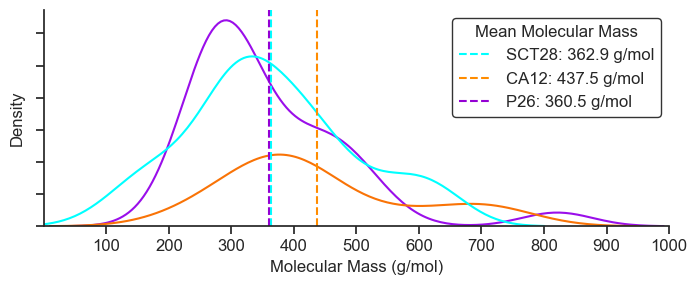

In [77]:
# Get Statistical data (mean and standard deviation) for molecular masses

Mass_SCT28 = SCT28['mass'].tolist()
Mass_CA12 = CA12['mass'].tolist()
Mass_P26 = P26['mass'].tolist()
Average_Mass_SCT28 = round(sum(Mass_SCT28) / len(Mass_SCT28), 1)
Average_Mass_CA12 = round(sum(Mass_CA12) / len(Mass_CA12), 1)
Average_Mass_P26 = round(sum(Mass_P26) / len(Mass_P26), 1)

st_dev_mass1 = round(statistics.stdev(Mass_SCT28), 1)
st_dev_mass2 = round(statistics.stdev(Mass_CA12), 1)
st_dev_mass3 = round(statistics.stdev(Mass_P26), 1)

print("Standard deviations of molecular masses from each dataset:")
print("SCT28:", st_dev_mass1)
print("CA12:", st_dev_mass2)
print("P26:", st_dev_mass3)

# Make a KDE plot using Seaborn for molecular mass distribution

ax = sns.displot(data = all_asphaltenes, # specifies the dataframe from which we are pulling
                 x = 'mass', # which data are we plotting
                 hue = 'Classification', # Either SCT28, CA12, or P26
                 kind = 'kde', # kernal density estimate
                 #rug = True, # adds a rug plot at the x axis of the graph
                 height = 3, 
                 aspect = 2.53, 
                 bw_adjust = 0.85,  # bw is by default set to 1. Increasing it makes the line smoother
                 linewidth = 1.5) 

ax.set(xlabel=('Molecular Mass (g/mol)'),
       ylabel='Density',
       xlim=(0, 1000),
       yticklabels=[])

ax._legend.remove() # removes seaborn's default legend

# Add vertical lines for the mean values

# Add vertical lines for the mean values
plt.axvline(Average_Mass_SCT28, color='cyan', linestyle='dashed', linewidth=1.5, label=f'SCT28: {Average_Mass_SCT28} g/mol')
plt.axvline(Average_Mass_CA12, color='darkorange', linestyle='dashed', linewidth=1.5, label=f'CA12: {Average_Mass_CA12} g/mol')
plt.axvline(Average_Mass_P26, color='darkviolet', linestyle='dashed', linewidth=1.5, label=f'P26: {Average_Mass_P26} g/mol')

# Display the legend
plt.legend(title='Mean Molecular Mass', edgecolor = 'black', fontsize = 12)

# Set number of ticks in x-axis
x_ticks = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
plt.xticks(x_ticks, labels=[f'{int(tick)}' for tick in x_ticks], fontsize = 12)
# Set a title
#plt.title('Molecular Mass Distribution', fontdict={'fontsize': 12, 'fontweight': 'bold'})

# Save the figure
ax.savefig("Molecular_Mass_Distribution.png", dpi=1200)

### <u> DBE Figures </u>

In [46]:
# Get Statistical data (mean and standard deviation) for DBE's

DBE_SCT28 = SCT28['dbe'].tolist()
DBE_CA12 = CA12['dbe'].tolist()
DBE_P26 = P26['dbe'].tolist()
Average_DBE_SCT28 = round(sum(DBE_SCT28) / len(DBE_SCT28), 1)
Average_DBE_CA12 = round(sum(DBE_CA12) / len(DBE_CA12), 1)
Average_DBE_P26 = round(sum(DBE_P26) / len(DBE_P26), 1)
print("Average double-bond equivalents from each dataset:")
print("SCT28:", Average_DBE_SCT28)
print("CA12:", Average_DBE_CA12)
print("P26:", Average_DBE_P26)
st_dev_DBE_SCT28 = round(statistics.stdev(DBE_SCT28), 1)
st_dev_DBE_CA12 = round(statistics.stdev(DBE_CA12), 1)
st_dev_DBE_P26 = round(statistics.stdev(DBE_P26), 1)
print("Standard deviations of double-bond equivalents from each dataset:")
print("SCT28:", st_dev_DBE_SCT28)
print("CA12:", st_dev_DBE_CA12)
print("P26:", st_dev_DBE_P26)

Average double-bond equivalents from each dataset:
SCT28: 19.2
CA12: 26.3
P26: 19.4
Standard deviations of double-bond equivalents from each dataset:
SCT28: 7.9
CA12: 9.9
P26: 7.5


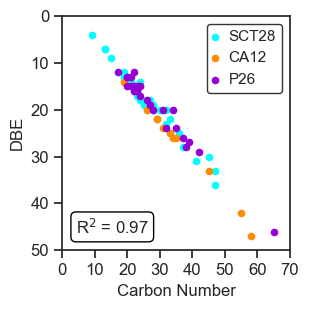

In [88]:
# Plot scatter plot
fig, ax = plt.subplots(figsize=(3.25, 3.25))
ax.scatter(SCT28['number_of_C'], SCT28['dbe'], c='cyan', label='SCT28', s=20)
ax.scatter(CA12['number_of_C'], CA12['dbe'], c='darkorange', label='CA12', s=20)
ax.scatter(P26['number_of_C'], P26['dbe'], c='darkviolet', label='P26', s=20)

ax.invert_yaxis()

# Set x and y ticks
x_ticks = [0, 10, 20, 30, 40, 50, 60, 70]
plt.xticks(x_ticks, labels=[f'{int(tick)}' for tick in x_ticks], fontsize=12)
y_ticks = [50, 40, 30, 20, 10, 0]
plt.yticks(y_ticks, labels=[f'{int(tick)}' for tick in y_ticks], fontsize=12)

# Add legend and labels
plt.legend(loc='upper right', edgecolor = 'black', handlelength = 0.2)
#plt.title("DBE vs Carbon Number", fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.xlabel('Carbon Number')
plt.ylabel('DBE')
plt.tight_layout()

# Concatenate data from all three datasets
X = np.concatenate((SCT28['number_of_C'], CA12['number_of_C'], P26['number_of_C'])).reshape(-1, 1)
y = np.concatenate((SCT28['dbe'], CA12['dbe'], P26['dbe'])).reshape(-1, 1)

# Perform linear regression
reg = LinearRegression().fit(X, y)

# Predict the values
y_pred = reg.predict(X)

# Calculate R2 value
r2 = r2_score(y, y_pred)

# Annotate the plot with R2 value
plt.annotate(f'R$^2$ = {r2:.2f}', xy=(0.06, 0.07), xycoords='axes fraction', fontsize=12,
            bbox=dict(boxstyle='round, pad = 0.3', fc='white', ec='black'))

# Save and show the plot
plt.savefig('DBE_VS_Carbon_Number.png', dpi=1200)
plt.show()

### <u> HOMO-LUMO Gap Figures

In [30]:
HLgap_SCT28 = SCT28['HOMO_LUMO_Gap'].tolist()
HLgap_CA12 = CA12['HOMO_LUMO_Gap'].tolist()
HLgap_P26 = P26['HOMO_LUMO_Gap'].tolist()
Average_HLgap_SCT28 = round(sum(HLgap_SCT28) / len(HLgap_SCT28), 2)
Average_HLgap_CA12 = round(sum(HLgap_CA12) / len(HLgap_CA12), 2)
Average_HLgap_P26 = round(sum(HLgap_P26) / len(HLgap_P26), 2)
print("Average HOMO-LUMO gaps from each dataset:")
print("SCT28:", Average_HLgap_SCT28)
print("CA12:", Average_HLgap_CA12)
print("P26:", Average_HLgap_P26)
st_dev_HLgap_SCT28 = round(statistics.stdev(HLgap_SCT28), 1)
st_dev_HLgap_CA12 = round(statistics.stdev(HLgap_CA12), 1)
st_dev_HLgap_P26 = round(statistics.stdev(HLgap_P26), 1)
print("Standard deviations of HOMO-LUMO gaps from each dataset:")
print("SCT28:", st_dev_HLgap_SCT28)
print("CA12:", st_dev_HLgap_CA12)
print("P26:", st_dev_HLgap_P26)

Average HOMO-LUMO gaps from each dataset:
SCT28: 1.87
CA12: 1.81
P26: 1.91
Standard deviations of HOMO-LUMO gaps from each dataset:
SCT28: 0.9
CA12: 0.4
P26: 0.5


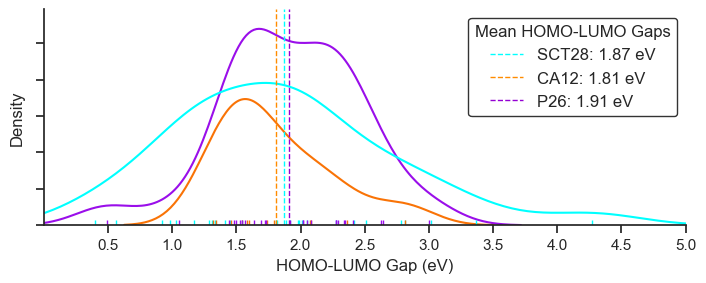

In [52]:
# Make a KDE plot using Seaborn for HOMO-LUMO Gap distribution

ax = sns.displot(data = all_asphaltenes, x = 'HOMO_LUMO_Gap', hue = 'Classification', kind = 'kde', rug = True,
                height = 3, aspect = 2.5, bw_adjust = 0.85)
ax.set(xlabel = 'HOMO-LUMO Gap (eV)', 
       ylabel = 'Density', 
       xlim = (0,5),
       yticklabels = [])
ax._legend.remove()

# Add vertical lines for the mean values
plt.axvline(Average_HLgap_SCT28, color = 'cyan', linestyle = 'dashed', linewidth = 1, label = f'SCT28: {Average_HLgap_SCT28} eV')
plt.axvline(Average_HLgap_CA12, color = 'darkorange', linestyle = 'dashed', linewidth = 1, label = f'CA12: {Average_HLgap_CA12} eV')
plt.axvline(Average_HLgap_P26, color = 'darkviolet', linestyle = 'dashed', linewidth = 1, label = f'P26: {Average_HLgap_P26} eV')

# Display the legend
plt.legend(title = 'Mean HOMO-LUMO Gaps', edgecolor = 'black', fontsize = 12)

# Set number of ticks in x-axis
x_ticks = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
plt.xticks(x_ticks, labels = [f'{tick:.1f}' for tick in x_ticks])

# Set a title
#plt.title('HOMO-LUMO Gap Distribution', fontdict = {'fontsize': 12, 'fontweight': 'bold'})

# Save the figure
ax.savefig("HOMO-LUMO_Gap_Distribution", dpi = 1200)

### <u> Overall Electronic Dipole Moment Figures 

In [32]:
DM_SCT28 = SCT28['dipole_moment']
DM_CA12 = CA12['dipole_moment']
DM_P26 = P26['dipole_moment']
Average_DM_SCT28 = round(sum(DM_SCT28) / len(DM_SCT28), 3)
Average_DM_CA12 = round(sum(DM_CA12) / len(DM_CA12), 3)
Average_DM_P26 = round(sum(DM_P26) / len(DM_P26), 3)
print("Average dipole moment from each dataset:")
print("SCT28:", Average_DM_SCT28)
print("CA12:", Average_DM_CA12)
print("P26:", Average_DM_P26)
st_dev_DM_SCT28 = round(statistics.stdev(DM_SCT28), 3)
st_dev_DM_CA12 = round(statistics.stdev(DM_CA12), 3)
st_dev_DM_P26 = round(statistics.stdev(DM_P26), 3)
print("Standard deviations of average dipole moment from each dataset:")
print("SCT28:", st_dev_DM_SCT28)
print("CA12:", st_dev_DM_CA12)
print("P26:", st_dev_DM_P26)

Average dipole moment from each dataset:
SCT28: 0.149
CA12: 0.023
P26: 0.051
Standard deviations of average dipole moment from each dataset:
SCT28: 0.151
CA12: 0.013
P26: 0.094


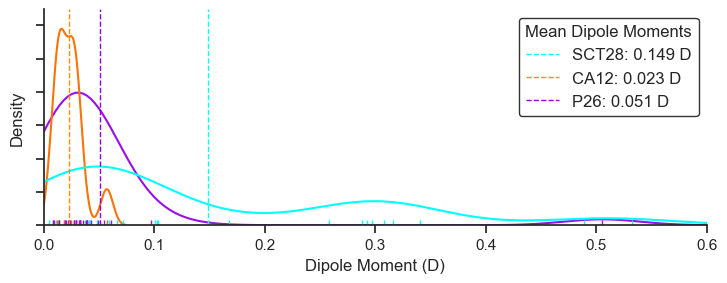

In [53]:
# Make a KDE plot using Seaborn for Dipole Moment distribution

ax = sns.displot(data = all_asphaltenes, x = 'dipole_moment', hue = 'Classification', kind = 'kde', rug = True,
                height = 3, aspect = 2.5, bw_adjust = 0.7)
ax.set(xlabel = 'Dipole Moment (D)', 
       ylabel = 'Density', 
       xlim = (0,0.6),
       yticklabels = [])
ax._legend.remove()

# Add vertical lines for the mean values
plt.axvline(Average_DM_SCT28, color = 'cyan', linestyle = 'dashed', linewidth = 1, label = f'SCT28: {Average_DM_SCT28} D')
plt.axvline(Average_DM_CA12, color = 'darkorange', linestyle = 'dashed', linewidth = 1, label = f'CA12: {Average_DM_CA12} D')
plt.axvline(Average_DM_P26, color = 'darkviolet', linestyle = 'dashed', linewidth = 1, label = f'P26: {Average_DM_P26} D')

# Display the legend
plt.legend(title = 'Mean Dipole Moments', edgecolor = 'black', fontsize = 12)

# Set a title
#plt.title('Dipole Moment Distribution', fontdict = {'fontsize': 12, 'fontweight': 'bold'})

# Save the figure
ax.savefig("Dipole_Moment_Distribution", dpi = 1200)

The higher average dipole moment of the SCT28 dataset than the other two datasets is explained by the higher number of heteroatoms in this dataset. Heteroatoms significantly increase the electric dipole moment of these polyaromatic rings. The number of heteroatoms of each dataset is shown below.

In [34]:
het_SCT28 = SCT28['heteroatoms'].tolist()
het_CA12 = CA12['heteroatoms'].tolist()
het_P26 = P26['heteroatoms'].tolist()

num_het_SCT28 = 0
num_het_CA12 = 0
num_het_P26 = 0
for het in het_SCT28:
    num_het_SCT28 += het
for het in het_CA12:
    num_het_CA12 += het
for het in het_P26:
    num_het_P26 += het
print("number of heteroatoms in SCT28 dataset:", num_het_SCT28)
print("number of heteroatoms in CA12 dataset:", num_het_CA12)
print("number of heteroatoms in P26 dataset:", num_het_P26)

number of heteroatoms in SCT28 dataset: 12
number of heteroatoms in CA12 dataset: 0
number of heteroatoms in P26 dataset: 1


### <u>LogP Figures

In [35]:
LogP_SCT28 = SCT28['LogP']
LogP_CA12 = CA12['LogP']
LogP_P26 = P26['LogP']
Average_LogP_SCT28 = round(sum(LogP_SCT28) / len(LogP_SCT28), 1)
Average_LogP_CA12 = round(sum(LogP_CA12) / len(LogP_CA12), 1)
Average_LogP_P26 = round(sum(LogP_P26) / len(LogP_P26), 1)
print("Average LogP from each dataset:")
print("SCT28:", Average_LogP_SCT28)
print("CA12:", Average_LogP_CA12)
print("P26:", Average_LogP_P26)
st_dev_LogP_SCT28 = round(statistics.stdev(LogP_SCT28), 1)
st_dev_LogP_CA12 = round(statistics.stdev(LogP_CA12), 1)
st_dev_LogP_P26 = round(statistics.stdev(LogP_P26), 1)
print("Standard deviations of LogP from each dataset:")
print("SCT28:", st_dev_LogP_SCT28)
print("CA12:", st_dev_LogP_CA12)
print("P26:", st_dev_LogP_P26)

Average LogP from each dataset:
SCT28: 7.8
CA12: 9.8
P26: 7.9
Standard deviations of LogP from each dataset:
SCT28: 2.9
CA12: 3.5
P26: 2.9


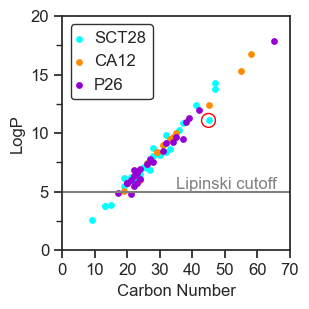

In [54]:
import matplotlib.ticker as ticker

# Scatter plot
fig, ax = plt.subplots(figsize=(3.25, 3.25))
ax.scatter(SCT28['number_of_C'], SCT28['LogP'], c='cyan', label='SCT28', s=15)
ax.scatter(CA12['number_of_C'], CA12['LogP'], c='darkorange', label='CA12', s=15)
ax.scatter(P26['number_of_C'], P26['LogP'], c='darkviolet', label='P26', s=15)

# Add Lipinski cutoff line
ax.axhline(y=5, color='grey')
plt.annotate('Lipinski cutoff', color='grey', xy=(35, 5.2))

# Highlight the point at (45, 11.085) with a red circle
ax.scatter(45, 11.08486, c='none', s=100, edgecolors='red')

# Legend
plt.legend(loc='upper left', edgecolor='black', fontsize=12, handlelength=0.2)

# Title and labels
#plt.title("LogP vs Carbon Number", fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.xlabel('Carbon Number')
plt.ylabel('LogP')

# Set ticks
x_ticks = [0, 10, 20, 30, 40, 50, 60, 70]
plt.xticks(x_ticks, labels=[f'{int(tick)}' for tick in x_ticks], fontsize=12)
y_ticks = [0, 5, 10, 15, 20]
plt.yticks(y_ticks, labels=[f'{int(tick)}' for tick in y_ticks], fontsize=12)
ax.set_yticks([2.5, 7.5, 12.5, 17.5], minor=True)
plt.tight_layout()
plt.savefig('LogP_vs_Carbon_Number.png', dpi=1200)
plt.show()


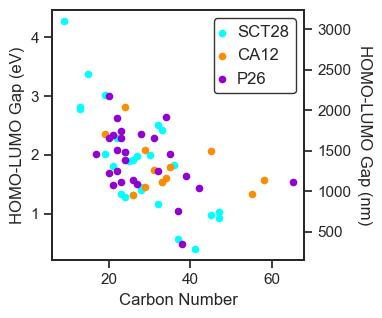

In [55]:
# Function to convert energy in eV to wavelength in nm
def energy_to_wavelength(energy):
    return 1240 / energy

fig, ax1 = plt.subplots(figsize = (3.25, 3.25))

# Scatter plot for HOMO-LUMO Gap vs Molecular Mass
ax1.scatter(SCT28['number_of_C'], SCT28['HOMO_LUMO_Gap'], color = 'cyan', label = 'SCT28', s = 20)
ax1.scatter(CA12['number_of_C'], CA12['HOMO_LUMO_Gap'], color = 'darkorange', label = 'CA12', s = 20)
ax1.scatter(P26['number_of_C'], P26['HOMO_LUMO_Gap'], color = 'darkviolet', label = 'P26', s = 20)

ax1.legend(loc = 'upper right', handlelength = 0.2, edgecolor = 'black', fontsize = 12)
#ax1.set_title("HOMO-LUMO Gap vs Carbon Number", fontdict = {'fontsize': 12, 'fontweight': 'bold'})
ax1.set_xlabel('Carbon Number')
ax1.set_ylabel('HOMO-LUMO Gap (eV)')

# Create a twin axis sharing the x-axis
ax2 = ax1.twinx()

# Convert HOMO-LUMO Gap to Wavelength
wavelength_SCT28 = energy_to_wavelength(SCT28['HOMO_LUMO_Gap'])
wavelength_CA12 = energy_to_wavelength(CA12['HOMO_LUMO_Gap'])
wavelength_P26 = energy_to_wavelength(P26['HOMO_LUMO_Gap'])

# Scatter plot for Wavelength vs Molecular Mass
ax2.scatter(SCT28['number_of_C'], wavelength_SCT28, color = 'cyan', alpha = 0)  # alpha = 0 to make it invisible
ax2.scatter(CA12['number_of_C'], wavelength_CA12, color = 'darkorange', alpha = 0)
ax2.scatter(P26['number_of_C'], wavelength_P26, color = 'darkviolet', alpha = 0)
ax2.set_ylabel('HOMO-LUMO Gap (nm)', rotation = 270, labelpad = 15)

ax2.grid(False)


plt.savefig('HOMO_LUMO_Gap_vs_C_number_with_Wavelength.png',
            bbox_inches = 'tight', 
            pad_inches = 0.3, 
            dpi = 1200)
plt.show()

# UV-Visible Absorbance Spectrum

A more computationally vigorous calculation was done to get the ten lowest-energy excited states and the corresponding transition dipole moment for each asphaltene. This was done using PySCF, given in a separate notebook. The following spectral plotting is achieved via a Guassian broadening function in which the transition dipole moment (TDM) determines the intensity of a transition and the HOMO-LUMO Gap (EHL) determines at which wavelength the transition will take place, producing an absorbance peak: 

A = TDM * e^-(EHL - E)^2/sigma^2

where A is absorcance, E is the photon energy over which the spectrum is plotted, and sigma is a broadening factor.

In [56]:
data = np.genfromtxt('/Users/greteljordan/Dr. Janesko\'s Lab/UVvis_HLgap_TDM.txt', dtype=None, names=True, encoding=None)

# Extract molecular identities without ".out:" ending
mol_out = data['Identity']
mol = [a.replace('.out:', '') for a in mol_out]

# Delete duplicates
unique_mol = []
for item in mol:
    if item not in unique_mol:
        unique_mol.append(item)
        
# Split TDM and HL gap data into chunks of ten entries
tdm_chunks = [data['TransitionDipoleMoment'][i:i+10] for i in range(0, len(data), 10)]
hl_gap_chunks = [data['HomoLumoGap_nm'][i:i+10] for i in range(0, len(data), 10)]

# Create lists for each molecule
for idx, molecule in enumerate(unique_mol):
    tdm_list = tdm_chunks[idx]
    hl_gap_list = hl_gap_chunks[idx]
    # Naming the lists with the identifier at the end
    globals()[f"HL_gap_{molecule}"] = hl_gap_list
    globals()[f"TDM_{molecule}"] = tdm_list

# Test printing CA1 lists
print(HL_gap_CA1)
print(TDM_CA1)
print(unique_mol)

[377.03 356.28 311.06 310.94 282.51 282.29 274.49 271.37 257.61 250.72]
[0.0053 0.0022 0.413  0.9246 0.     0.0935 0.0115 0.033  0.0324 0.0028]
['CA13', 'CA14', 'CA15', 'CA16', 'CA1', 'CA21', 'CA22', 'CA23', 'CA2', 'CA6', 'CA7', 'CA9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P16', 'P17', 'P18', 'P19', 'P1', 'P20', 'P21', 'P22', 'P23', 'P24', 'P26', 'P28', 'P29', 'P2', 'P30', 'P3', 'P5', 'P6', 'P7', 'P8', 'P9', 'SCT10', 'SCT11', 'SCT12', 'SCT13', 'SCT14', 'SCT15', 'SCT16', 'SCT17', 'SCT18', 'SCT19', 'SCT1', 'SCT20', 'SCT21', 'SCT22', 'SCT23', 'SCT24', 'SCT25', 'SCT26', 'SCT27', 'SCT28', 'SCT2', 'SCT3', 'SCT4', 'SCT5', 'SCT6', 'SCT7', 'SCT8', 'SCT9']


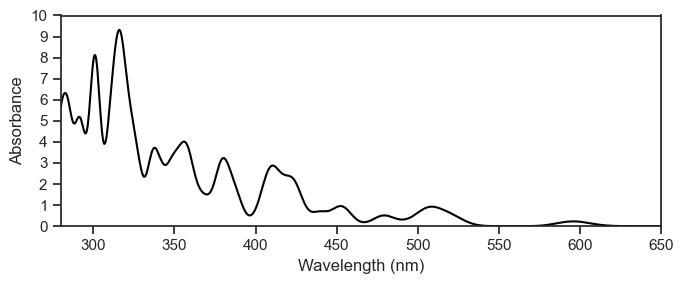

In [92]:
#set seaborn colors
sns.set_palette('bright')

# Define function for absorbance calculation
def calculate_absorbance(energy, intensity, photon_energy_eV, broadening):
    return intensity * np.exp(-((energy - photon_energy_eV) ** 2) / (broadening ** 2))

# Define photon energy range from 300 to 900 nm
photon_energy_eV = np.linspace(1.378, 4.428, 601)  # Corresponding to 300 to 900 nm in eV
broadening = 0.05  # Sigma value
#4.136
# Initialize dictionary to store absorbance for each molecule
absorbance_dict = {}

# Iterate over each molecule
for molecule in unique_mol:
    # Get HOMO-LUMO gap and TDM lists for the current molecule
    hl_gap_list = globals().get('HL_gap_' + molecule)
    tdm_list = globals().get('TDM_' + molecule)
    
    # Check if both lists exist for the current molecule
    if hl_gap_list is not None and tdm_list is not None:
        # Initialize absorbance array for the current molecule
        absorbance = np.zeros_like(photon_energy_eV)
        
        # Calculate absorbance for each transition
        for hl_gap, intensity in zip(hl_gap_list, tdm_list):
            energy = 1240 / hl_gap  # Convert wavelength to eV
            absorbance += calculate_absorbance(energy, intensity, photon_energy_eV, broadening)
        
        # Store absorbance in the dictionary
        absorbance_dict[molecule] = absorbance

# Convert photon energy to wavelength in nanometers
wavelength_nm = 1240 / photon_energy_eV

# Plot absorbance for all molecules
plt.figure(figsize=(7, 3))
ensemble_absorbance = np.zeros_like(photon_energy_eV)
for molecule, absorbance in absorbance_dict.items():
    ensemble_absorbance += absorbance
plt.plot(wavelength_nm, ensemble_absorbance, color='black')

plt.xlim(280, 650) # There're no peaks between 650 and 850 nm
plt.ylim(0, 10)
plt.yticks(np.arange(0, 11, 1))
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.grid(False)
plt.tight_layout()
plt.savefig('ensemble_absorbance.png', dpi=600)
plt.show()

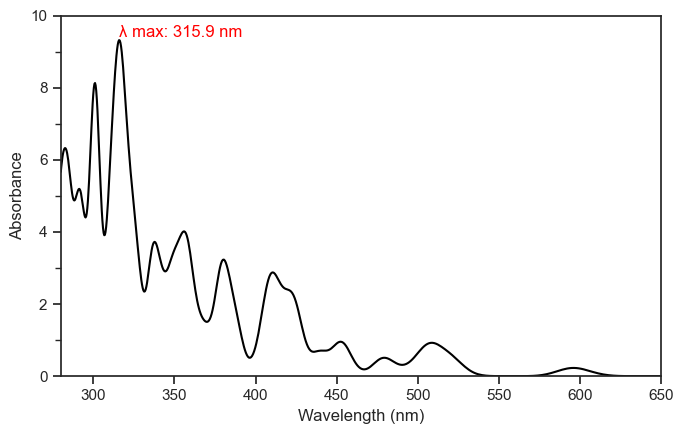

In [93]:
# Find wavelength corresponding to the maximum absorbance value
lambda_max = wavelength_nm[np.argmax(ensemble_absorbance)]
max_absorbance = np.max(ensemble_absorbance)

# Plot absorbance for all molecules
plt.figure(figsize=(7, 4.5))
ensemble_absorbance = np.zeros_like(photon_energy_eV)
for molecule, absorbance in absorbance_dict.items():
    ensemble_absorbance += absorbance
plt.plot(wavelength_nm, ensemble_absorbance, color='black')

# Label lambda max
plt.text(lambda_max, max_absorbance, f'λ max: {lambda_max:.1f} nm', ha='left', va='bottom', fontsize=12, color='red')

plt.xlim(280, 650) # There're no peaks between 650 and 850 nm
plt.ylim(0, 10)
plt.yticks(np.arange(0, 12, 2))
plt.yticks(np.arange(0, 11), minor=True)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.grid(False)
plt.tight_layout()
plt.savefig('ensemble_absorbance.png', dpi=1200)
plt.show()


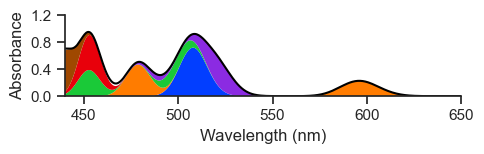

In [97]:
# Define function for absorbance calculation
def calculate_absorbance(energy, intensity, photon_energy_eV, broadening):
    return intensity * np.exp(-((energy - photon_energy_eV) ** 2) / (broadening ** 2))

# Define photon energy range from 300 to 900 nm
photon_energy_eV = np.linspace(1.378, 2.818, 601)  # Corresponding to 430 to 900 nm in eV
broadening = 0.05  # Sigma value

# Initialize dictionary to store absorbance for each molecule
absorbance_dict = {}

# Initialize dictionary to store integrals
integral_dict = {}

# Iterate over each molecule
for molecule in unique_mol:
    # Get HOMO-LUMO gap and TDM lists for the current molecule
    hl_gap_list = globals().get('HL_gap_' + molecule)
    tdm_list = globals().get('TDM_' + molecule)
    
    # Check if both lists exist for the current molecule
    if hl_gap_list is not None and tdm_list is not None:
        # Initialize absorbance array for the current molecule
        absorbance = np.zeros_like(photon_energy_eV)
        
        # Calculate absorbance for each transition
        for hl_gap, intensity in zip(hl_gap_list, tdm_list):
            energy = 1240 / hl_gap  # Convert wavelength to eV
            absorbance += calculate_absorbance(energy, intensity, photon_energy_eV, broadening)
        
        # Store absorbance in the dictionary
        absorbance_dict[molecule] = absorbance
        
        # Calculate integral using trapezoidal rule
        integral = np.trapz(absorbance, photon_energy_eV)
        integral_dict[molecule] = integral

# Sort the integral dictionary based on integral values (descending order)
sorted_integrals = sorted(integral_dict.items(), key=lambda x: x[1], reverse=True)

# Convert photon energy to wavelength in nanometers
wavelength_nm = 1240 / photon_energy_eV

# Plot absorbance for all molecules
plt.figure(figsize=(5, 1.7))
ensemble_absorbance = np.zeros_like(photon_energy_eV)
for molecule, absorbance in absorbance_dict.items():
    ensemble_absorbance += absorbance
plt.plot(wavelength_nm, ensemble_absorbance, color='black', label = 'Ensemble')

# Stacked plot of the absorbance for the top ten molecules
ten_absorbance = 0
for i, (molecule, integral) in enumerate(sorted_integrals[:6]):
    ten_absorbance += absorbance_dict[molecule]
    stack = ten_absorbance - absorbance_dict[molecule]  # Adjust the offset value as needed
    absorbance_single_stacked = absorbance_dict[molecule] + stack
    plt.fill_between(wavelength_nm, absorbance_single_stacked, stack, edgecolor='none', linewidth=0, label=f'{molecule}')

plt.xlim(440, 650) # There're no peaks between 650 and 850 nm; small peak starting around 900, didn't include.
plt.ylim(0, 1.2)
plt.yticks(np.arange(0, 1.6, 0.4))
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.grid(False)
plt.tight_layout()
#plt.legend(ncol = 2)

# Remove spines:
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('ensemble_absorbance_visible_with_individuals.png', dpi=1200)
plt.show()

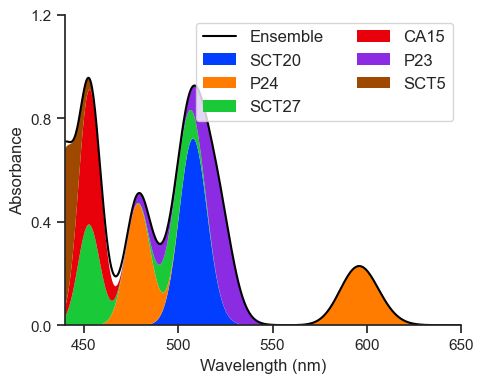

In [101]:
# Define function for absorbance calculation
def calculate_absorbance(energy, intensity, photon_energy_eV, broadening):
    return intensity * np.exp(-((energy - photon_energy_eV) ** 2) / (broadening ** 2))

# Define photon energy range from 300 to 900 nm
photon_energy_eV = np.linspace(1.378, 2.818, 601)  # Corresponding to 430 to 900 nm in eV
broadening = 0.05  # Sigma value

# Initialize dictionary to store absorbance for each molecule
absorbance_dict = {}

# Initialize dictionary to store integrals
integral_dict = {}

# Iterate over each molecule
for molecule in unique_mol:
    # Get HOMO-LUMO gap and TDM lists for the current molecule
    hl_gap_list = globals().get('HL_gap_' + molecule)
    tdm_list = globals().get('TDM_' + molecule)
    
    # Check if both lists exist for the current molecule
    if hl_gap_list is not None and tdm_list is not None:
        # Initialize absorbance array for the current molecule
        absorbance = np.zeros_like(photon_energy_eV)
        
        # Calculate absorbance for each transition
        for hl_gap, intensity in zip(hl_gap_list, tdm_list):
            energy = 1240 / hl_gap  # Convert wavelength to eV
            absorbance += calculate_absorbance(energy, intensity, photon_energy_eV, broadening)
        
        # Store absorbance in the dictionary
        absorbance_dict[molecule] = absorbance
        
        # Calculate integral using trapezoidal rule
        integral = np.trapz(absorbance, photon_energy_eV)
        integral_dict[molecule] = integral

# Sort the integral dictionary based on integral values (descending order)
sorted_integrals = sorted(integral_dict.items(), key=lambda x: x[1], reverse=True)

# Convert photon energy to wavelength in nanometers
wavelength_nm = 1240 / photon_energy_eV

# Plot absorbance for all molecules
plt.figure(figsize=(5, 4))
ensemble_absorbance = np.zeros_like(photon_energy_eV)
for molecule, absorbance in absorbance_dict.items():
    ensemble_absorbance += absorbance
plt.plot(wavelength_nm, ensemble_absorbance, color='black', label = 'Ensemble')

# Stacked plot of the absorbance for the top ten molecules
ten_absorbance = 0
for i, (molecule, integral) in enumerate(sorted_integrals[:6]):
    ten_absorbance += absorbance_dict[molecule]
    stack = ten_absorbance - absorbance_dict[molecule]  # Adjust the offset value as needed
    absorbance_single_stacked = absorbance_dict[molecule] + stack
    plt.fill_between(wavelength_nm, absorbance_single_stacked, stack, edgecolor='none', linewidth=0, label=f'{molecule}')

plt.xlim(440, 650) # There're no peaks between 650 and 850 nm; small peak starting around 900, didn't include.
plt.ylim(0, 1.2)
plt.yticks(np.arange(0, 1.6, 0.4))
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.grid(False)
plt.tight_layout()
plt.legend(fontsize = 12,  ncol = 2)

# Remove spines:
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('abs_legend.png', dpi=1200)
plt.show()